In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
from PIL import Image
import json

In [2]:
# Define a transformation pipeline for preprocessing images for CNN visualization:

# Compose several transforms together:
transform = transforms.Compose([transforms.Resize((224,224)), # Resize the input image to 224x224 pixels.
                                transforms.ToTensor(), # Convert the image to a PyTorch tensor.
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) # Normalize the tensor using the specified mean and standard deviation.

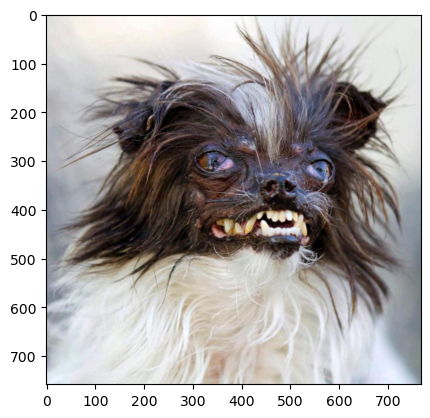

In [3]:
image = Image.open('dog.jpg')
plt.imshow(image)

In [4]:
# Load the VGG16 model pre-trained on ImageNet.
vgg = models.vgg16(pretrained=True)

C:\Users\Chang.LAPTOP-KLP71L1N\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Chang.LAPTOP-KLP71L1N\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Chang.LAPTOP-KLP71L1N/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [00:27<00:00, 19.8MB/s]


In [5]:
# Accessing the last layer of the classifier module in the VGG16 model:

# The VGG16 model has a feature extractor and a classifier as its main parts.
# The classifier is a sequential container of fully connected layers.
# This line is accessing the last layer of the classifier, which is typically the output layer.
vgg.classifier[-1]    # or vgg.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [6]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [7]:
# Apply the transforms on the image:
image = transform(image)

In [8]:
print(image.shape)

torch.Size([3, 224, 224])


In [9]:
# Add a batch dimension to the image tensor:

# The 'unsqueeze' method adds an additional dimension to the tensor.
# Here, it adds a batch dimension at the 0th position of the tensor.
image = image.unsqueeze(0)

In [10]:
# Wrap the image tensor in a Variable:

# The 'Variable' class from torch.autograd is used to wrap tensors.
# This enables automatic differentiation, which is essential for backpropagation in neural networks.
image = Variable(image)

In [11]:
# Transfer the image tensor to the GPU if CUDA is available:
if CUDA:
    image = image.cuda()

In [12]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [15]:
# Pass the image through the VGG16 model to get the output:
output = vgg(image)

In [14]:
print(output.shape)

torch.Size([1, 1000])


In [16]:
# Convert the output from a 2D tensor to a 1D tensor:
output = output.squeeze(0)

In [17]:
print(output.shape)

torch.Size([1000])


In [19]:
# Open the JSON file containing the ImageNet class labels and load it:
labels = json.load(open('imagenet_class_index.json'))

In [20]:
index = output.max(0)

In [21]:
print(index)

torch.return_types.max(
values=tensor(17.1777, grad_fn=<MaxBackward0>),
indices=tensor(157))


In [25]:
# Check the shape of the output tensor
print(output.shape)

# If output is 1D, use dimension 0 in torch.max
if len(output.shape) == 1:
    
    # Find the maximum value and its index in the output tensor:
    max_value, max_index = torch.max(output, 0)
    
    # Convert the index tensor to a Python integer:
    index = max_index.item()
    
    # Convert the index to a string:
    index_str = str(index)
    
    # Retrieve the label corresponding to the predicted index.
    # 'labels' is expected to be a dictionary where the keys are string representations
    # of class indices, and the values are tuples or lists containing class information.
    # The label of interest is in the second position of this tuple/list.
    label = labels[index_str][1]

torch.Size([1000])


In [26]:
print(label)

papillon


In [28]:
# Extract the modules from the 'features' part of the VGG16 model.
# The 'features' attribute of VGG16 contains the convolutional layers.
module_list = list(vgg.features.modules())

In [29]:
# Print the entire feature extractor part of the VGG16 model:
print(vgg.features)

# Print the first module (layer) in the feature extractor part:
print(module_list[0])

# Print the second module (layer) in the feature extractor part:
print(module_list[1])

# Print the third module (layer) in the feature extractor part:
print(module_list[2])

# Display the list of all modules (layers) in the feature extractor part:
module_list

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [30]:
# Initialize empty lists to store the outputs of each layer and the names of the layers:
outputs = []
names = []

# Iterate through each layer in the feature extractor part of the VGG16 model, starting from the second layer:
for layer in module_list[1:]:
    # Apply the current layer to the image:
    image = layer(image)
    
    # Append the output of the current layer to the 'outputs' list:
    outputs.append(image)
    
    # Append the name (string representation) of the current layer to the 'names' list.
    names.append(str(layer))

In [31]:
# Iterate through each feature map in the 'outputs' list:
for feature_map in outputs:
    # Print the shape of the current feature map:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [32]:
# Initialize an empty list to store the processed feature maps:
processed = []

# Iterate through each feature map in the 'outputs' list:
for feature_map in outputs:
    # Remove the batch dimension from the feature map:
    feature_map = feature_map.squeeze(0)
    
    # Sum the feature map across the channel dimension to convert it from 3D to 2D.
    # This creates a grayscale representation by aggregating the information across all channels.
    gray_scale = torch.sum(feature_map, 0)
    
    # Normalize the grayscale image by dividing by the number of channels:
    gray_scale = gray_scale/feature_map.shape[0]
    
    # Convert the tensor to a NumPy array and move it to CPU memory if necessary:
    processed.append(gray_scale.data.cpu().numpy())

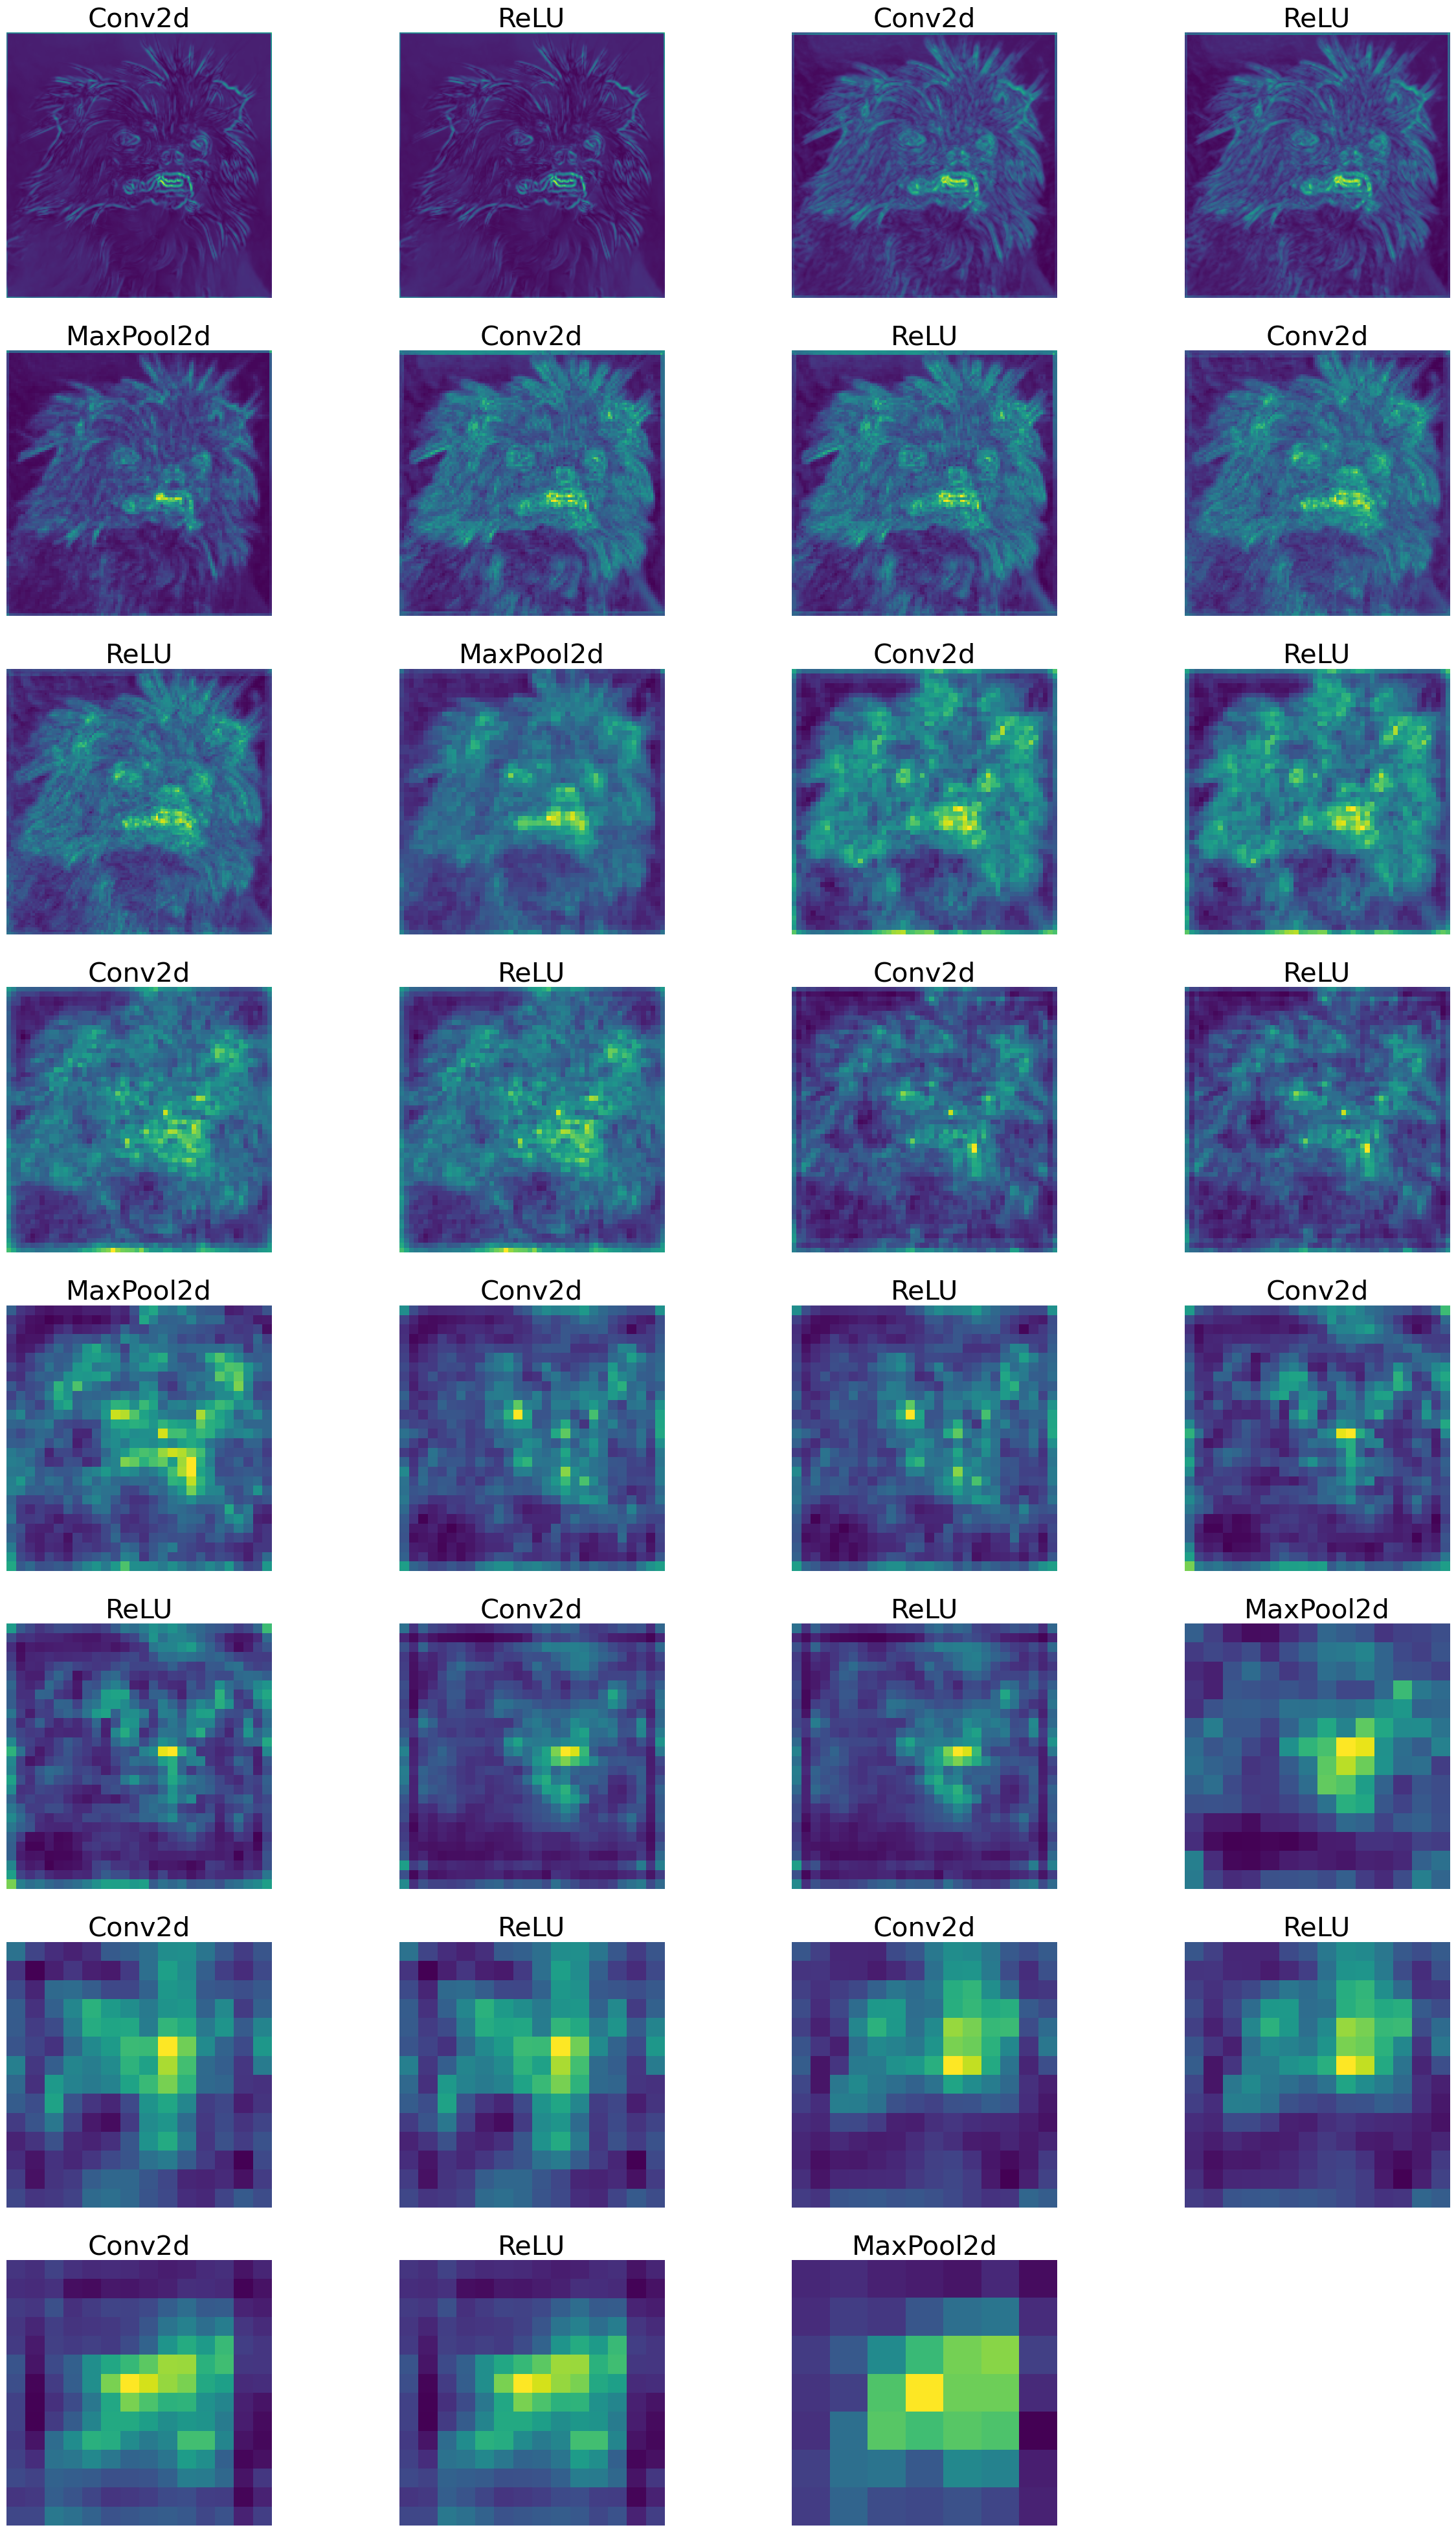

In [33]:
# Create a figure with a specified size for plotting the feature maps:
fig = plt.figure(figsize = (30,50))

# Iterate through the processed feature maps:
for i in range(len(processed)):
    # Add a subplot to the figure for each feature map:
    a = fig.add_subplot(8,4,i+1)
    
    # Plot the feature map as an image in the subplot:
    imgplot = plt.imshow(processed[i])
    
    # Turn off the axis to only display the image:
    plt.axis('off')
    
    # Set the title of the subplot to the name of the corresponding layer.
    # The layer name is extracted from the 'names' list and formatted.
    a.set_title(names[i].split('(')[0], fontsize=30)

# Save the figure as an image file:
plt.savefig('feature_maps.jpg', bbox_inches='tight')